In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
g = np.genfromtxt('gaia_data_csv',delimiter=',',skip_header=1)

# find out how many parallaxes are negative, and how many parallaxes and bp_rp values are NaN

x=0
for line in g:
    if line[39] <= 0:
        x=x+1
        
y=0
for line in g:
    if np.isnan(line[39]) == True:
        y=y+1

z=0
for line in g:
    if np.isnan(line[93]) == True:
        z=z+1
        
# note that for some lines, both the parallax and bp_rp are NaN
        
print('Total number of objects in file:',int(np.size(np.transpose(g)[0])))
print('Number of non-positive parallaxes:',x)
print('Number of objects without a measurement for the parallax:',y)
print('Number of objects without a measurement for bp_rp:',z)
        
# remove non-positive parallaxes and lines where bp_rp or parallax is NaN by creating array
# containing the indices of the lines where that is the case:

a=np.array([])
for i in np.arange(int(np.size(np.transpose(g)[0]))):
    if (g[int(i)][39] <= 0) or (np.isnan(g[int(i)][39]) == True):
        a=np.append(a,i)

a = a.astype(int)        # np.delete wants integers
        
g = np.transpose(np.delete(g,a,0))   # transpose since columns and rows are mixed up

print('Number of objects in plot #1:',int(np.size(g[0])))

g1 = np.transpose(g)

# find out how many parallaxes' relative precision is too unprecise

t=0
for line in g1:
    if np.abs(line[41]) < 5:
        t=t+1
        
print('Number of parallaxes with relative precision larger than 20% (of remaining 19476 objects):',t)
print('Number of objects left to plot final:',int(np.size(np.transpose(g1)[0])-t))

# remove objects where parallax/parallax_error < 5 as above

b=np.array([])
for i in np.arange(int(np.size(np.transpose(g1)[0]))):
    if np.abs(g1[i][41]) <= 5:
        b=np.append(b,i)
        
b = b.astype(int)

g1 = np.transpose(np.delete(g1,b,0))

Total number of objects in file: 18373
Number of non-positive parallaxes: 533
Number of objects without a measurement for the parallax: 62
Number of objects without a measurement for bp_rp: 0
Number of objects in plot #1: 17778
Number of parallaxes with relative precision larger than 20% (of remaining 19476 objects): 7573
Number of objects left to plot final: 10205


In [3]:
parallax20 = g1[39]
parallax_e20 = g1[40]
G20 = g1[80]
bp_rp20 = g1[93]
E_B_V20 = g1[12]
B_V20 = g1[13]

bp_rp_020 = 0.9604*B_V20 + 0.2473

e_bp_rp020 = bp_rp20 - bp_rp_020

# extinction in G band

c1=0.9761*np.ones(np.size(G20))
c2=-0.1704*np.ones(np.size(G20))
c3=0.0086*np.ones(np.size(G20))
c4=0.0011*np.ones(np.size(G20))
c5=-0.0438*np.ones(np.size(G20))
c6=0.0013*np.ones(np.size(G20))
c7=0.0099*np.ones(np.size(G20))

A_020=3.1*E_B_V20

k_G20=c1+c2*bp_rp_020+c3*bp_rp_020**2+c4*bp_rp_020**3+c5*A_020+c6*A_020**2+c7*bp_rp_020*A_020

A_G20=k_G20*A_020

M_G1 = G20 + 5 + 5*np.log10(parallax20/1000) - A_G20  # absolute magnitude in mag, derived using the distance modulus
                                            # parallax is in mas --> factor 1/1000

In [4]:
def cut1(x):
    return 4*x+2.93

def cut2(x):
    return 20*x-5.07

g2 = np.transpose(g1)

c=np.array([])
for i in np.arange(int(np.size(np.transpose(g2)[0]))):
    if M_G1[i] >= cut1((bp_rp_020[i])) or M_G1[i] >= cut2((bp_rp_020[i])):               # c stores all the objects below the line
        c=np.append(c,i)

c = c.astype(int)

g2 = np.transpose(np.delete(g2,c,0))           # g2 stores all but the white dwarf candidates

parallax20_2 = g2[39]
parallax_e20_2 = g2[40]
G20_2 = g2[80]
bp_rp20_2 = g2[93]
E_B_V20_2 = g2[12]
B_V20_2 = g2[13]

bp_rp_020_2 = 0.9604*B_V20_2 + 0.2473

e_bp_rp020_2 = bp_rp20_2 - bp_rp_020_2

# extinction in G band

c1=0.9761*np.ones(np.size(G20_2))
c2=-0.1704*np.ones(np.size(G20_2))
c3=0.0086*np.ones(np.size(G20_2))
c4=0.0011*np.ones(np.size(G20_2))
c5=-0.0438*np.ones(np.size(G20_2))
c6=0.0013*np.ones(np.size(G20_2))
c7=0.0099*np.ones(np.size(G20_2))

A_020_2=3.1*E_B_V20_2

k_G20_2=c1+c2*bp_rp_020_2+c3*bp_rp_020_2**2+c4*bp_rp_020_2**3+c5*A_020_2+c6*A_020_2**2+c7*bp_rp_020_2*A_020_2

A_G20_2=k_G20_2*A_020_2

M_G2 = G20_2 + 5 + 5*np.log10(parallax20_2/1000) - A_G20_2

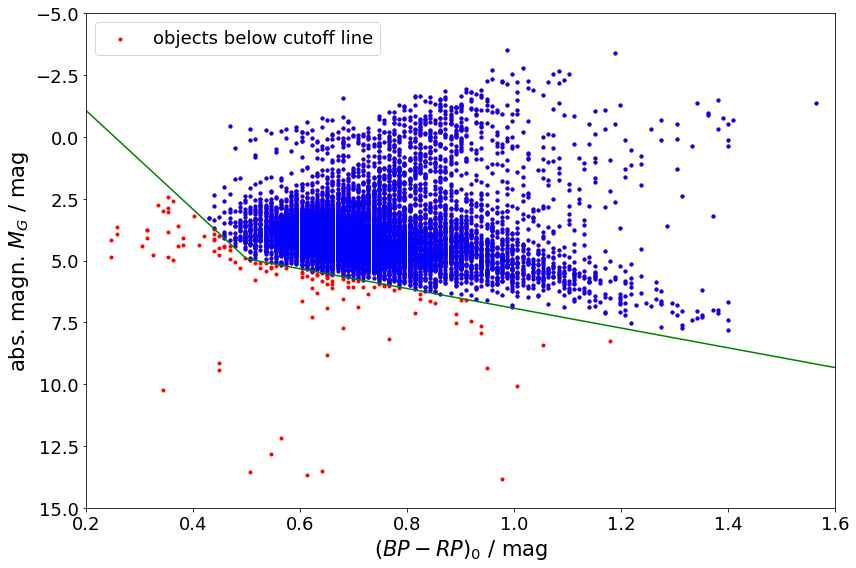

In [5]:
x1=np.linspace(0.5,1.6)
x2=np.linspace(0.2,0.5)
plt.figure(figsize=(12,8))
plt.scatter(bp_rp_020,M_G1,marker='.',color='red',label='objects below cutoff line')
plt.scatter(bp_rp_020_2,M_G2,marker='.',color='blue')
plt.plot(x1,cut1(x1),color='green')
plt.plot(x2,cut2(x2),color='green')
plt.ylim(15,-5)
plt.xlim(0.2,1.6)
plt.yticks(size=18)
plt.xticks(size=18)
plt.xlabel('$(BP-RP)_0$ / mag',size=21)
plt.ylabel('abs. magn. $M_G$ / mag',size=21)
#plt.title('Marking the white dwarf candidates and hot subdwarf candidates (dereddened)',size=20)
plt.legend(loc='upper left',fontsize=18)
plt.tight_layout()
plt.savefig('Abbildungen/marking_wd_region_dered.png')

In [6]:
g5 = np.transpose(g1)

c1=np.array([])
for i in np.arange(int(np.size(np.transpose(g5)[0]))):
    if M_G1[i] <= cut1(bp_rp_020[i]) and M_G1[i] <= cut2(bp_rp_020[i]):               # c stores all the objects above the line
        c1=np.append(c1,i)

c1 = c1.astype(int)

g5 = np.transpose(np.delete(g5,c1,0))           # g2 stores all the white dwarf candidates

parallax205 = g5[39]
parallax_e205 = g5[40]
G205 = g5[80]
bp_rp205 = g5[93]
E_B_V205 = g5[12]
B_V205 = g5[13]

bp_rp_0205 = 0.9604*B_V205 + 0.2473

e_bp_rp0205 = bp_rp205 - bp_rp_0205

# extinction in G band

c1=0.9761*np.ones(np.size(G205))
c2=-0.1704*np.ones(np.size(G205))
c3=0.0086*np.ones(np.size(G205))
c4=0.0011*np.ones(np.size(G205))
c5=-0.0438*np.ones(np.size(G205))
c6=0.0013*np.ones(np.size(G205))
c7=0.0099*np.ones(np.size(G205))

A_0205=3.1*E_B_V205

k_G205=c1+c2*bp_rp_0205+c3*bp_rp_0205**2+c4*bp_rp_0205**3+c5*A_0205+c6*A_0205**2+c7*bp_rp_0205*A_0205

A_G205=k_G205*A_0205

M_G5 = G205 + 5 + 5*np.log10(parallax205/1000) - A_G205  # absolute magnitude in mag, derived using the distance modulus
                                            # parallax is in mas --> factor 1/1000

In [7]:
wd = open('white_dwarfs_csv_dered.txt','w')                        # create text file
wd.write('M_G,angDist,_RAJ2000,_DEJ2000,_r,recno,HE,HESid,RAJ2000,DEJ2000,Field,Type,Bmag,E(B-V),(B-V)0,(J-K)0,(V-K)0,S/N(B),S/N(Ca),KP,e_KP,GP,f1,f2,f3,Class,[Fe/H]K,[Fe/H]R,[C/Fe]R,X,dist,solution_id,designation,source_id_cone,random_index,ref_epoch,ra_cone,ra_error_cone,dec_cone,dec_error_cone,parallax_cone,parallax_error_cone,parallax_over_error,pmra_cone,pmra_error_cone,pmdec_cone,pmdec_error_cone,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source_cone,phot_g_n_obs,phot_g_mean_flux_cone,phot_g_mean_flux_error_cone,phot_g_mean_flux_over_error,phot_g_mean_mag_cone,phot_bp_n_obs,phot_bp_mean_flux_cone,phot_bp_mean_flux_error_cone,phot_bp_mean_flux_over_error,phot_bp_mean_mag_cone,phot_rp_n_obs,phot_rp_mean_flux_cone,phot_rp_mean_flux_error_cone,phot_rp_mean_flux_over_error,phot_rp_mean_mag_cone,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp_cone,bp_g,g_rp,radial_velocity_cone,radial_velocity_error_cone,rv_nb_transits_cone,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val_cone,teff_percentile_lower,teff_percentile_upper,a_g_val_cone,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val_cone,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val_cone,radius_percentile_lower,radius_percentile_upper,lum_val_cone,lum_percentile_lower,lum_percentile_upper\n')
with open('gaia_data_csv', 'r') as searchfile:
    for line in searchfile:
        for i in range(int(np.size(c))):
            if str(g1[39][c[i]]) in line:              # identify the lines by choosing those that contain the value
                                                      # given by index c[i]
                wd.write(str(M_G5[i])+','+line)
                
wd.close()

In [8]:
wd1 = open('white_dwarfs_coord_dered.txt','w')                        # create text file

with open('gaia_data', 'r') as searchfile:
    for line in searchfile:
        for i in range(int(np.size(c))):
            if str(g1[39][c[i]]) in line:              # identify the lines by choosing those that contain the value
                                                      # given by index c[i]
                wd1.write(line[13:34])                 # write only coordinates
                wd1.write('\n')
                
wd1.close()

In [9]:
hs = open('hot_subdwarfs_simbad_dered.txt','w')
hs.write('M_G,angDist,_RAJ2000,_DEJ2000,_r,recno,HE,HESid,RAJ2000,DEJ2000,Field,Type,Bmag,E(B-V),(B-V)0,(J-K)0,(V-K)0,S/N(B),S/N(Ca),KP,e_KP,GP,f1,f2,f3,Class,[Fe/H]K,[Fe/H]R,[C/Fe]R,X,dist,solution_id,designation,source_id_cone,random_index,ref_epoch,ra_cone,ra_error_cone,dec_cone,dec_error_cone,parallax_cone,parallax_error_cone,parallax_over_error,pmra_cone,pmra_error_cone,pmdec_cone,pmdec_error_cone,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source_cone,phot_g_n_obs,phot_g_mean_flux_cone,phot_g_mean_flux_error_cone,phot_g_mean_flux_over_error,phot_g_mean_mag_cone,phot_bp_n_obs,phot_bp_mean_flux_cone,phot_bp_mean_flux_error_cone,phot_bp_mean_flux_over_error,phot_bp_mean_mag_cone,phot_rp_n_obs,phot_rp_mean_flux_cone,phot_rp_mean_flux_error_cone,phot_rp_mean_flux_over_error,phot_rp_mean_mag_cone,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp_cone,bp_g,g_rp,radial_velocity_cone,radial_velocity_error_cone,rv_nb_transits_cone,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val_cone,teff_percentile_lower,teff_percentile_upper,a_g_val_cone,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val_cone,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val_cone,radius_percentile_lower,radius_percentile_upper,lum_val_cone,lum_percentile_lower,lum_percentile_upper\n')

hs_index = np.array([1,15,27,34,37,39,52,56,58,62,81,87,103,104,108,126])

with open('white_dwarfs_csv_dered.txt','r') as file:
    lines=file.readlines()
    for i in hs_index:
        hs.write(lines[i])
        
hs.close()

In [10]:
wd2 = open('white_dwarfs_simbad_dered.txt','w')
wd2.write('M_G,angDist,_RAJ2000,_DEJ2000,_r,recno,HE,HESid,RAJ2000,DEJ2000,Field,Type,Bmag,E(B-V),(B-V)0,(J-K)0,(V-K)0,S/N(B),S/N(Ca),KP,e_KP,GP,f1,f2,f3,Class,[Fe/H]K,[Fe/H]R,[C/Fe]R,X,dist,solution_id,designation,source_id_cone,random_index,ref_epoch,ra_cone,ra_error_cone,dec_cone,dec_error_cone,parallax_cone,parallax_error_cone,parallax_over_error,pmra_cone,pmra_error_cone,pmdec_cone,pmdec_error_cone,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source_cone,phot_g_n_obs,phot_g_mean_flux_cone,phot_g_mean_flux_error_cone,phot_g_mean_flux_over_error,phot_g_mean_mag_cone,phot_bp_n_obs,phot_bp_mean_flux_cone,phot_bp_mean_flux_error_cone,phot_bp_mean_flux_over_error,phot_bp_mean_mag_cone,phot_rp_n_obs,phot_rp_mean_flux_cone,phot_rp_mean_flux_error_cone,phot_rp_mean_flux_over_error,phot_rp_mean_mag_cone,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp_cone,bp_g,g_rp,radial_velocity_cone,radial_velocity_error_cone,rv_nb_transits_cone,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val_cone,teff_percentile_lower,teff_percentile_upper,a_g_val_cone,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val_cone,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val_cone,radius_percentile_lower,radius_percentile_upper,lum_val_cone,lum_percentile_lower,lum_percentile_upper\n')

wd2_index = np.array([25,46,66])

with open('white_dwarfs_csv_dered.txt','r') as file:
    lines=file.readlines()
    for i in wd2_index:
        wd2.write(lines[i])
        
wd2.close()

In [11]:
wd3 = np.transpose(np.genfromtxt('white_dwarfs_simbad_dered.txt',delimiter=',',skip_header=1))
hs1 = np.transpose(np.genfromtxt('hot_subdwarfs_simbad_dered.txt',delimiter=',',skip_header=1))

# for hot subdwarfs

B_Vhs = hs1[14]
bp_rp_0hs = 0.9604*B_Vhs + 0.2473

# for white dwarfs

B_Vwd = wd3[14]
bp_rp_0wd = 0.9604*B_Vwd + 0.2473

print('White dwarfs:')

for i in range(3):
    print('Coordinates: ra='+str(wd3[36][i])+'°+/-'+str(wd3[37][i])+'mas')
    print('             dec='+str(wd3[38][i])+'°+/-'+str(wd3[39][i])+'mas')
    print('G magnitude: G='+str(wd3[81][i])+'mag')
    print('Effective temperature: '+str(wd3[109][i])+'-'+str(wd3[109][i]-wd3[110][i])+'+'+str(wd3[111][i]-wd3[109][i])+'K\n')
    
print('Hot subdwarfs:')
    
for i in range(16):
    print('Coordinates: ra='+str(hs1[36][i])+'°+/-'+str(hs1[37][i])+'mas')
    print('             dec='+str(hs1[38][i])+'°+/-'+str(hs1[39][i])+'mas')
    print('G magnitude: G='+str(hs1[81][i])+'mag')
    print('Effective temperature: '+str(hs1[109][i])+'-'+str(hs1[109][i]-hs1[110][i])+'+'+str(hs1[111][i]-hs1[109][i])+'K\n')

White dwarfs:
Coordinates: ra=38.96392520173907°+/-0.061117792263868854mas
             dec=1.3124634833636268°+/-0.04552341106397376mas
G magnitude: G=16.169216mag
Effective temperature: 6918.793-240.79299999999967+293.47400000000016K

Coordinates: ra=133.5933401877494°+/-0.04739786344490557mas
             dec=1.6140819645303395°+/-0.03339643970941093mas
G magnitude: G=16.014477mag
Effective temperature: 9613.0-1321.0+126.75K

Coordinates: ra=204.0816257483707°+/-0.07089562637622143mas
             dec=-6.63292503712895°+/-0.0667108133078741mas
G magnitude: G=15.95911mag
Effective temperature: 7176.0-270.0+1264.0K

Hot subdwarfs:
Coordinates: ra=1.4863430563265483°+/-0.035129783032925896mas
             dec=-34.885172371898°+/-0.02882230581292959mas
G magnitude: G=15.208056mag
Effective temperature: 9566.0-519.3330000000005+145.5K

Coordinates: ra=29.132937721248304°+/-0.10523728061980511mas
             dec=-13.907831015455923°+/-0.08403841987543076mas
G magnitude: G=12.267669mag
Ef

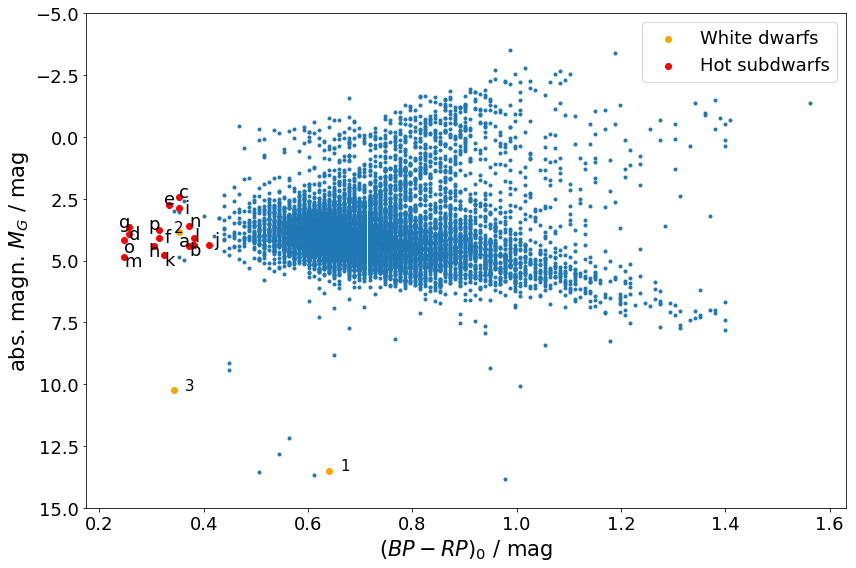

In [12]:
plt.figure(figsize=(12,8))
plt.scatter(bp_rp_020,M_G1,marker='.')

abc = 'abcdefghijklmnopqrstuvwxyz'

for i in range(int(np.size(wd3[0]))):
    if i == 1:
        plt.scatter(bp_rp_0wd[i],wd3[0][i],label='White dwarfs',color='orange')
        plt.text(bp_rp_0wd[i] - 0.01,wd3[0][i],i+1,fontsize=15)
    else:
        plt.scatter(bp_rp_0wd[i],wd3[0][i],color='orange')
        plt.text(bp_rp_0wd[i] + 0.02,wd3[0][i],i+1,fontsize=15)
        
#for i in range(int(np.size(hs1[0]))):
#    if bp_rp_0hs[i] > 0.34:
#        if hs1[0][i] > 4:
#            plt.scatter(bp_rp_0hs[i],hs1[0][i],label='Hot subdwarfs',color='g')
#            plt.text(bp_rp_0hs[i]+0.02,hs1[0][i]+0.2,abc[i],fontsize=15)
#        else:
#            plt.scatter(bp_rp_0hs[i],hs1[0][i],label='Hot subdwarfs',color='g')
#            plt.text(bp_rp_0hs[i]+0.02,hs1[0][i]-0.2,abc[i],fontsize=15)   
#    else:
#        if hs1[0][i] > 4:
#            plt.scatter(bp_rp_0hs[i],hs1[0][i],color='g')
#            plt.text(bp_rp_0hs[i] - 0.04,hs1[0][i]+0.2,abc[i],fontsize=15)
#        else:
#            plt.scatter(bp_rp_0hs[i],hs1[0][i],color='g')
#            plt.text(bp_rp_0hs[i] - 0.04,hs1[0][i]-0.2,abc[i],fontsize=15)

plt.scatter(bp_rp_0hs,hs1[0],color='red',label='Hot subdwarfs')
#plt.scatter(bp_rp_0wd,wd3[0],color='green',label='White dwarfs')

plt.text(bp_rp_0hs[0]-0.02,hs1[0][0],'a',fontsize=18)
plt.text(bp_rp_0hs[1]-0.01,hs1[0][1]+0.4,'b',fontsize=18)
plt.text(bp_rp_0hs[2],hs1[0][2],'c',fontsize=18)
plt.text(bp_rp_0hs[3],hs1[0][3]+0.2,'d',fontsize=18)
plt.text(bp_rp_0hs[4]-0.01,hs1[0][4],'e',fontsize=18)
plt.text(bp_rp_0hs[5]+0.01,hs1[0][5]+0.2,'f',fontsize=18)
plt.text(bp_rp_0hs[6]-0.02,hs1[0][6],'g',fontsize=18)
plt.text(bp_rp_0hs[7]-0.01,hs1[0][7]+0.4,'h',fontsize=18)
plt.text(bp_rp_0hs[8]+0.01,hs1[0][8]+0.2,'i',fontsize=18)
plt.text(bp_rp_0hs[9]+0.01,hs1[0][9],'j',fontsize=18)
plt.text(bp_rp_0hs[10],hs1[0][10]+0.4,'k',fontsize=18)
plt.text(bp_rp_0hs[11],hs1[0][11]+0.15,'l',fontsize=18)
plt.text(bp_rp_0hs[12],hs1[0][12]+0.4,'m',fontsize=18)
plt.text(bp_rp_0hs[13],hs1[0][13],'n',fontsize=18)
plt.text(bp_rp_0hs[14],hs1[0][14]+0.5,'o',fontsize=18)
plt.text(bp_rp_0hs[15]-0.02,hs1[0][15],'p',fontsize=18)


plt.ylim(15,-5)
plt.yticks(size=18)
plt.xticks(size=18)
plt.xlabel('$(BP-RP)_0$ / mag',size=21)
plt.ylabel('abs. magn. $M_G$ / mag',size=21)
#plt.title('White dwarfs and hot subdwarfs according to Simbad',size=20)
plt.legend(fontsize=18)
plt.tight_layout()
plt.savefig('Abbildungen/simbad_objects_dered.png')

In [13]:
h2 = np.transpose(g1)

c1=np.array([])
for i in np.arange(int(np.size(np.transpose(h2)[0]))):
    if M_G1[i] <= cut1(bp_rp_020[i]) and M_G1[i] <= cut2(bp_rp_020[i]):               # c1 stores all the objects above the line
        c1=np.append(c1,i)

c1 = c1.astype(int)

h2 = np.transpose(np.delete(h2,c1,0))           # g2 stores all the white dwarf candidates

parallax = h2[39]
parallax_e = h2[40]
G = h2[80]
bp_rp = h2[93]
E_B_V = h2[12]
B_V = h2[13]

bp_rp_0 = 0.9604*B_V + 0.2473

e_bp_rp0 = bp_rp - bp_rp_0

# extinction in G band

c1=0.9761*np.ones(np.size(G))
c2=-0.1704*np.ones(np.size(G))
c3=0.0086*np.ones(np.size(G))
c4=0.0011*np.ones(np.size(G))
c5=-0.0438*np.ones(np.size(G))
c6=0.0013*np.ones(np.size(G))
c7=0.0099*np.ones(np.size(G))

A_0=3.1*E_B_V

k_G=c1+c2*bp_rp_0+c3*bp_rp_0**2+c4*bp_rp_0**3+c5*A_0+c6*A_0**2+c7*bp_rp_0*A_0

A_G=k_G*A_0

M_G = G + 5 + 5*np.log10(parallax/1000) - A_G  # absolute magnitude in mag, derived using the distance modulus
                                            # parallax is in mas --> factor 1/1000

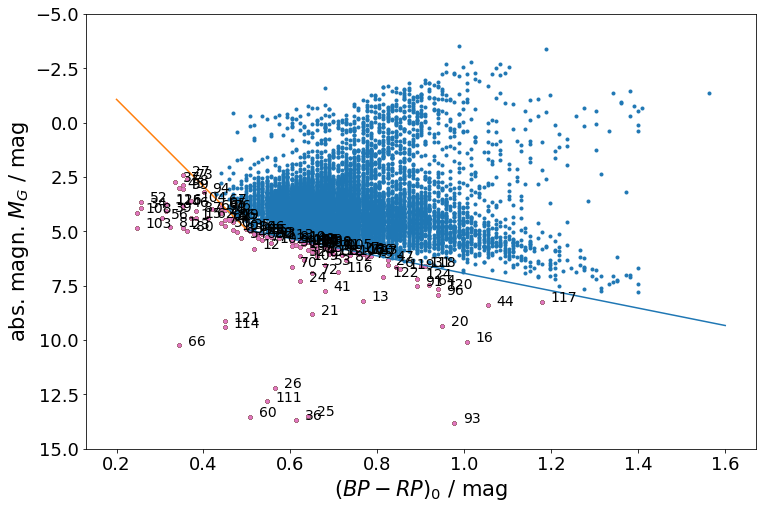

In [14]:
x1 = np.linspace(0.5,1.6)
x2 = np.linspace(0.2,0.5)
plt.figure(figsize=(12,8))
plt.scatter(bp_rp_020,M_G1,marker='.')

for i in range(int(np.size(h2[0]))):
    plt.scatter(bp_rp_0,M_G,marker='.')
    plt.text(bp_rp_0[i]+0.02,M_G[i],i+1,fontsize=14)
    
plt.plot(x1,cut1(x1))
plt.plot(x2,cut2(x2))
plt.ylim(15,-5)
plt.yticks(size=18)
plt.xticks(size=18)
plt.xlabel('$(BP-RP)_0$ / mag',size=21)
plt.ylabel('abs. magn. $M_G$ / mag',size=21)
#plt.title('WD candidates numbered',size=20)
#plt.legend(fontsize=16)
plt.savefig('Abbildungen/wd_region_dered_numb.png')

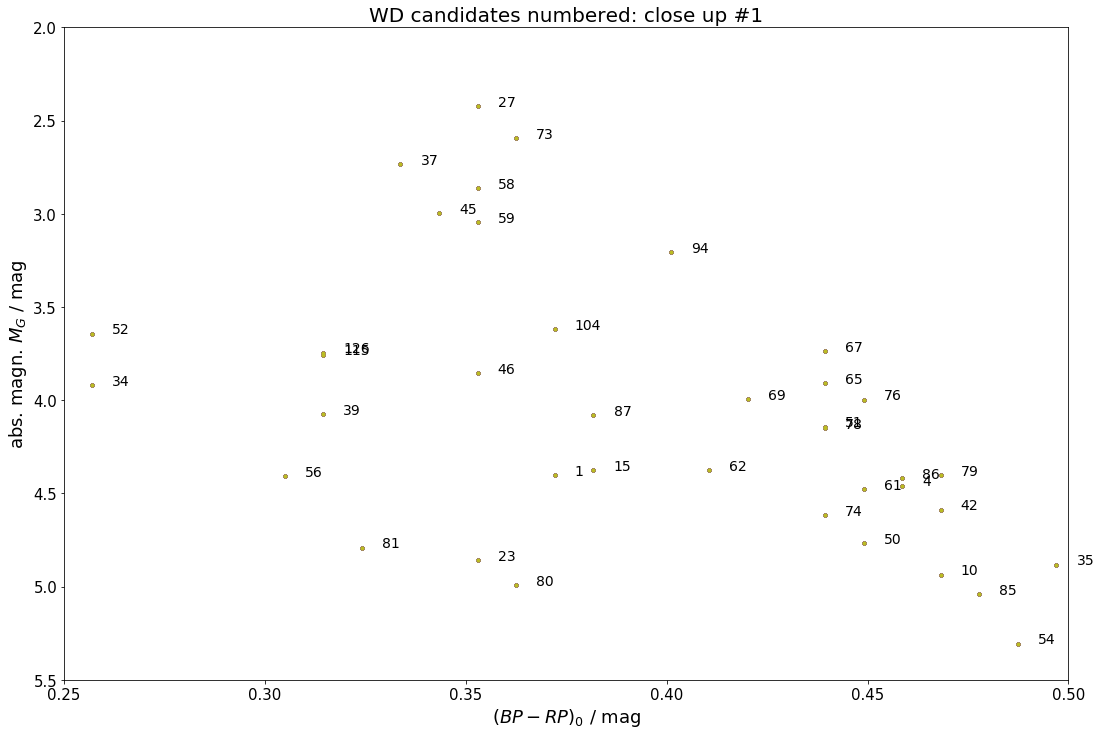

In [15]:
plt.figure(figsize=(18,12))

for i in range(int(np.size(h2[0]))):
    if bp_rp_0[i] <= 0.5 and bp_rp_0[i] >= 0.25 and M_G[i] >=2 and M_G[i] <= 5.5:
        plt.scatter(bp_rp_0,M_G,marker='.')
        plt.text(bp_rp_0[i]+0.005,M_G[i],i+1,fontsize=14)
    else:
        pass

plt.xlim(0.25,0.5)
plt.ylim(5.5,2)
plt.yticks(size=15)
plt.xticks(size=15)
plt.xlabel('$(BP-RP)_0$ / mag',size=18)
plt.ylabel('abs. magn. $M_G$ / mag',size=18)
plt.title('WD candidates numbered: close up #1',size=20)
#plt.legend(fontsize=16)
plt.savefig('Abbildungen/wd_region_dered_numb1.png')

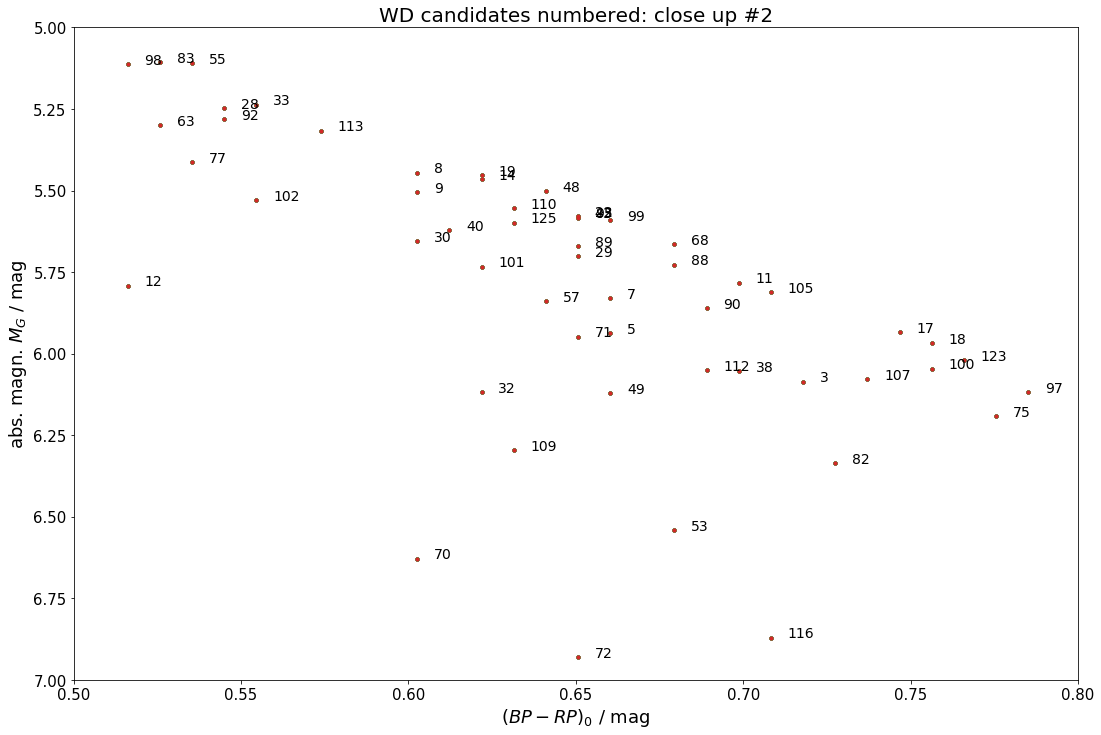

In [16]:
plt.figure(figsize=(18,12))

for i in range(int(np.size(h2[0]))):
    if bp_rp_0[i] <= 0.8 and bp_rp_0[i] >= 0.5 and M_G[i] >=5 and M_G[i] <= 7:
        plt.scatter(bp_rp_0,M_G,marker='.')
        plt.text(bp_rp_0[i]+0.005,M_G[i],i+1,fontsize=14)
    else:
        pass
    
plt.ylim(7,5)
plt.xlim(0.5,0.8)
plt.yticks(size=15)
plt.xticks(size=15)
plt.xlabel('$(BP-RP)_0$ / mag',size=18)
plt.ylabel('abs. magn. $M_G$ / mag',size=18)
plt.title('WD candidates numbered: close up #2',size=20)
#plt.legend(fontsize=16)
plt.savefig('Abbildungen/wd_region_dered_numb2.png')

In [17]:
wd4 = open('white_dwarfs_dered.txt','w')                        # create text file
wd4.write('# angDist    _RAJ2000   _DEJ2000     _r         recno   HE          HESid                RAJ2000      DEJ2000     Field   Type     Bmag   E(B-V)   (B-V)0   (J-K)0   (V-K)0   S/N(B)   S/N(Ca)   KP     e_KP   GP     f1   f2   f3   Class   [Fe/H]K   [Fe/H]R   [C/Fe]R   X   dist                     solution_id           designation                    source_id_cone        random_index   ref_epoch   ra_cone              ra_error_cone          dec_cone               dec_error_cone         parallax_cone           parallax_error_cone    parallax_over_error   pmra_cone              pmra_error_cone        pmdec_cone              pmdec_error_cone       ra_dec_corr     ra_parallax_corr   ra_pmra_corr    ra_pmdec_corr   dec_parallax_corr   dec_pmra_corr   dec_pmdec_corr   parallax_pmra_corr   parallax_pmdec_corr   pmra_pmdec_corr   astrometric_n_obs_al   astrometric_n_obs_ac   astrometric_n_good_obs_al   astrometric_n_bad_obs_al   astrometric_gof_al   astrometric_chi2_al   astrometric_excess_noise   astrometric_excess_noise_sig   astrometric_params_solved   astrometric_primary_flag   astrometric_weight_al   astrometric_pseudo_colour   astrometric_pseudo_colour_error   mean_varpi_factor_al   astrometric_matched_observations   visibility_periods_used   astrometric_sigma5d_max   frame_rotator_object_type   matched_observations   duplicated_source_cone   phot_g_n_obs   phot_g_mean_flux_cone   phot_g_mean_flux_error_cone   phot_g_mean_flux_over_error   phot_g_mean_mag_cone   phot_bp_n_obs   phot_bp_mean_flux_cone   phot_bp_mean_flux_error_cone   phot_bp_mean_flux_over_error   phot_bp_mean_mag_cone   phot_rp_n_obs   phot_rp_mean_flux_cone   phot_rp_mean_flux_error_cone   phot_rp_mean_flux_over_error   phot_rp_mean_mag_cone   phot_bp_rp_excess_factor   phot_proc_mode   bp_rp_cone   bp_g          g_rp         radial_velocity_cone   radial_velocity_error_cone   rv_nb_transits_cone   rv_template_teff   rv_template_logg   rv_template_fe_h   phot_variable_flag   l                     b                     ecl_lon               ecl_lat                priam_flags   teff_val_cone   teff_percentile_lower   teff_percentile_upper   a_g_val_cone   a_g_percentile_lower   a_g_percentile_upper   e_bp_min_rp_val_cone   e_bp_min_rp_percentile_lower   e_bp_min_rp_percentile_upper   flame_flags   radius_val_cone   radius_percentile_lower   radius_percentile_upper   lum_val_cone   lum_percentile_lower   lum_percentile_upper\n')
with open('gaia_data', 'r') as searchfile:
    for line in searchfile:
        for i in range(int(np.size(c))):
            if str(g1[39][c[i]]) in line:              # identify the lines by choosing those that contain the value
                                                      # given by index c[i]
                wd4.write(str(M_G5[i])+','+line)
                
wd4.close()

In [18]:
zo1 = open('zuordnung_wd_dered.txt','w')
wd = open('white_dwarfs_dered.txt','r')
wdread = wd.readlines()
for i in range(int(np.size(h2[0]))):
    zo1.write(str(i+1)+' - HE')
    zo1.write(wdread[i+1][73:105])
    zo1.write('\n')
    
zo1.close()

## For appendix (spectra with info and HRD)

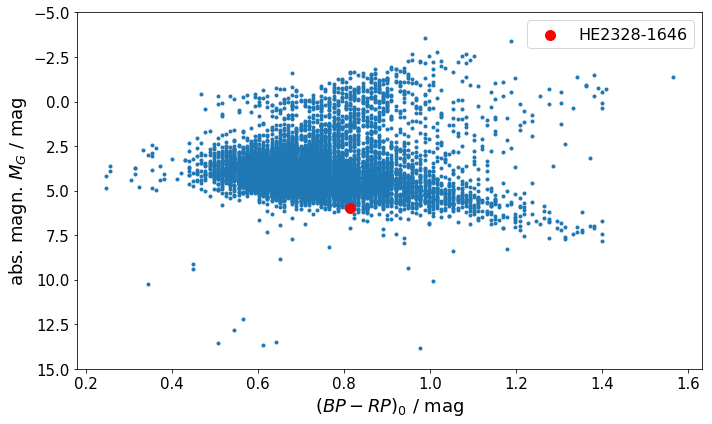

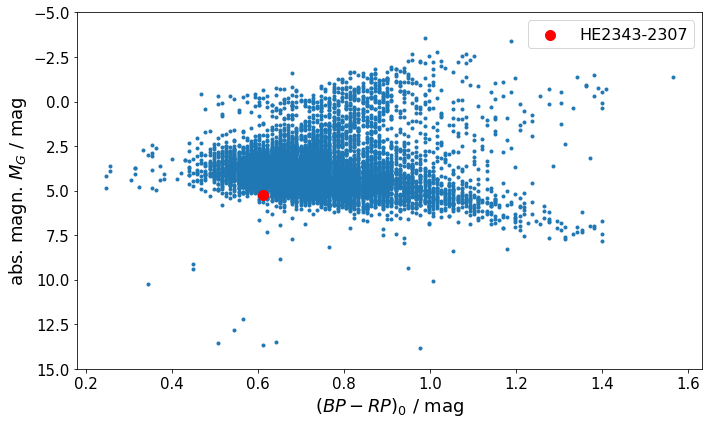

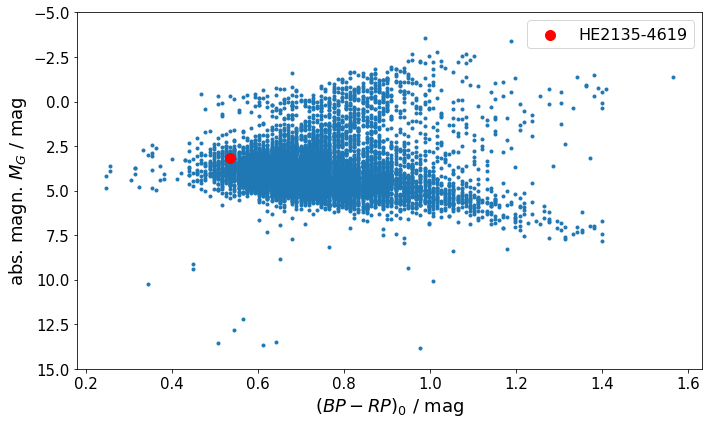

Absolute magnitude HE2135-4619: 3.193261652442495
Absolute magnitude HE2328-1646: 5.955564687987552
Absolute magnitude HE2343-2307: 5.234347772694561
Colour of HE2135-4619: 0.53542
Colour of HE2328-1646: 0.813936
Colour of HE2343-2307: 0.612252


In [19]:
#test=open('gaia_data_csv')
#tst=test.readlines()
#for i in range(np.size(tst)):
#    if '0205-2434' in tst[i]:
#        print(i)
#
#
#plt.figure(figsize=(10,6))
#plt.scatter(bp_rp_020,M_G1,marker='.')
#plt.scatter(bp_rp_020[3548],M_G1[3548],s=100,color='r',marker='o')
#plt.ylim(15,-5)
#plt.yticks(size=15)
#plt.xticks(size=15)
#plt.xlabel('$(BP-RP)_0$ / mag',size=18)
#plt.ylabel('abs. magn. $M_G$ / mag',size=18)
#plt.tight_layout()
#plt.legend(fontsize=16)


c1=0.9761
c2=-0.1704
c3=0.0086
c4=0.0011
c5=-0.0438
c6=0.0013
c7=0.0099

G2328 = 16.415768
G2343 = 15.491907
G2135 = 10.148324
par2328 = 0.8286931520546866
par2343 = 0.9219400983388166
par2135 = 4.168338481363389
E_B_V2328 = 0.02
E_B_V2343 = 0.03
E_B_V2135 = 0.02
bp_rp_02328 = 0.9604*0.59 + 0.2473
bp_rp_02343 = 0.9604*0.38 + 0.2473
bp_rp_02135 = 0.9604*0.3 + 0.2473

A_02328=3.1*E_B_V2328
A_02343=3.1*E_B_V2343
A_02135=3.1*E_B_V2135

k_G2328=c1+c2*bp_rp_02328+c3*bp_rp_02328**2+c4*bp_rp_02328**3+c5*A_02328+c6*A_02328**2+c7*bp_rp_02328*A_02328
k_G2343=c1+c2*bp_rp_02343+c3*bp_rp_02343**2+c4*bp_rp_02343**3+c5*A_02343+c6*A_02343**2+c7*bp_rp_02343*A_02343
k_G2135=c1+c2*bp_rp_02135+c3*bp_rp_02135**2+c4*bp_rp_02135**3+c5*A_02135+c6*A_02135**2+c7*bp_rp_02135*A_02135

A_G2328=k_G2328*A_02328
A_G2343=k_G2343*A_02343
A_G2135=k_G2135*A_02135

M_G2328 = G2328 + 5 + 5*np.log10(par2328/1000) - A_G2328
M_G2343 = G2343 + 5 + 5*np.log10(par2343/1000) - A_G2343
M_G2135 = G2135 + 5 + 5*np.log10(par2135/1000) - A_G2135

plt.figure(figsize=(10,6))
plt.scatter(bp_rp_020,M_G1,marker='.')
plt.scatter(bp_rp_02328,M_G2328,s=100,color='r',marker='o',label='HE2328-1646')
plt.ylim(15,-5)
plt.yticks(size=15)
plt.xticks(size=15)
plt.xlabel('$(BP-RP)_0$ / mag',size=18)
plt.ylabel('abs. magn. $M_G$ / mag',size=18)
plt.tight_layout()
plt.legend(fontsize=16)
plt.savefig('Abbildungen/Spektren_HRD/HE2328-1646_in_HRD.png')
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(bp_rp_020,M_G1,marker='.')
plt.scatter(bp_rp_02343,M_G2343,s=100,color='r',marker='o',label='HE2343-2307')
plt.ylim(15,-5)
plt.yticks(size=15)
plt.xticks(size=15)
plt.xlabel('$(BP-RP)_0$ / mag',size=18)
plt.ylabel('abs. magn. $M_G$ / mag',size=18)
plt.tight_layout()
plt.legend(fontsize=16)
plt.savefig('Abbildungen/Spektren_HRD/HE2343-2307_in_HRD.png')
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(bp_rp_020,M_G1,marker='.')
plt.scatter(bp_rp_02135,M_G2135,s=100,color='r',marker='o',label='HE2135-4619')
plt.ylim(15,-5)
plt.yticks(size=15)
plt.xticks(size=15)
plt.xlabel('$(BP-RP)_0$ / mag',size=18)
plt.ylabel('abs. magn. $M_G$ / mag',size=18)
plt.tight_layout()
plt.legend(fontsize=16)
plt.savefig('Abbildungen/Spektren_HRD/HE2135-4619_in_HRD.png')
plt.show()

print('Absolute magnitude HE2135-4619:',M_G2135)
print('Absolute magnitude HE2328-1646:',M_G2328)
print('Absolute magnitude HE2343-2307:',M_G2343)
print('Colour of HE2135-4619:',bp_rp_02135)
print('Colour of HE2328-1646:',bp_rp_02328)
print('Colour of HE2343-2307:',bp_rp_02343)

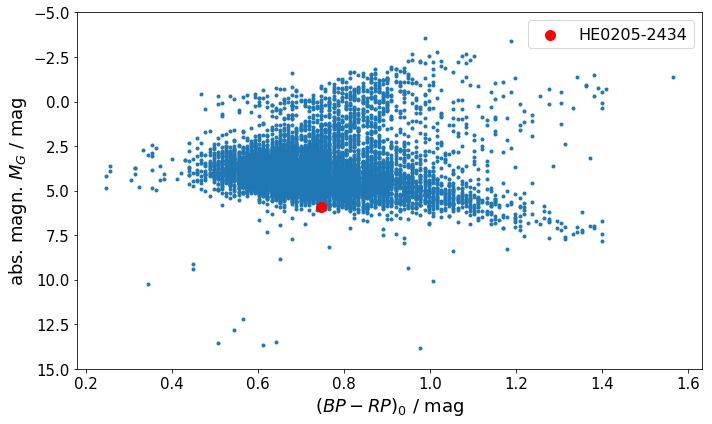

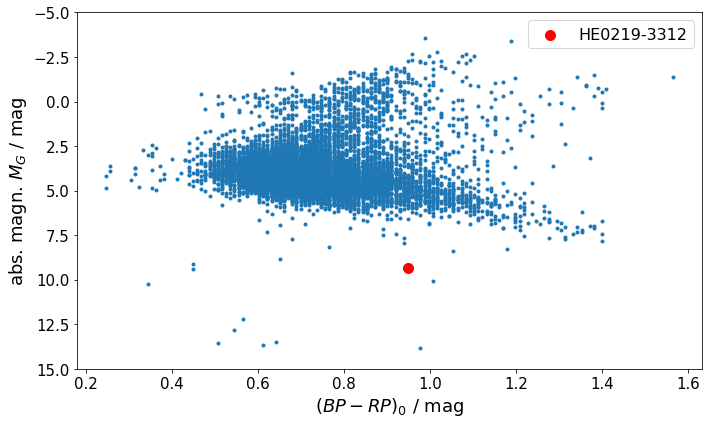

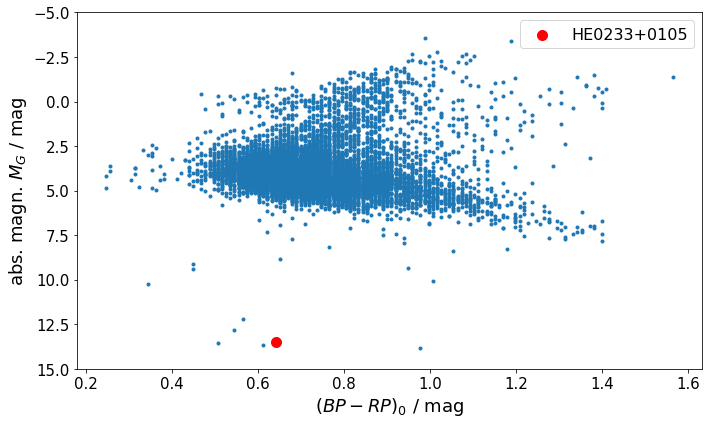

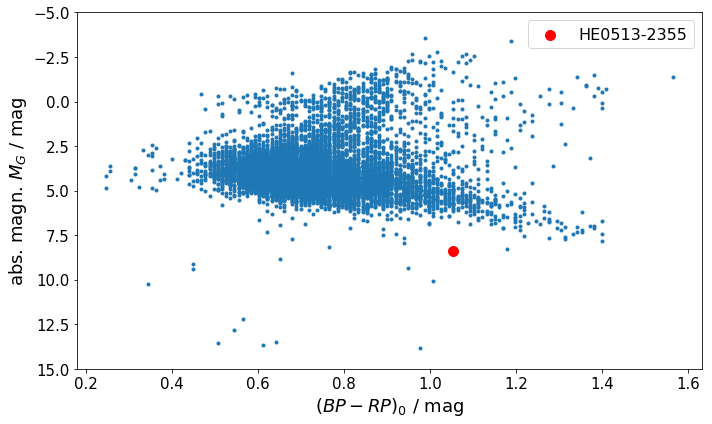

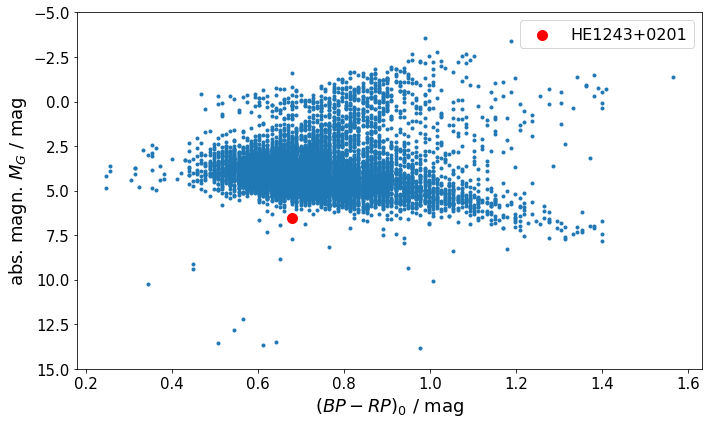

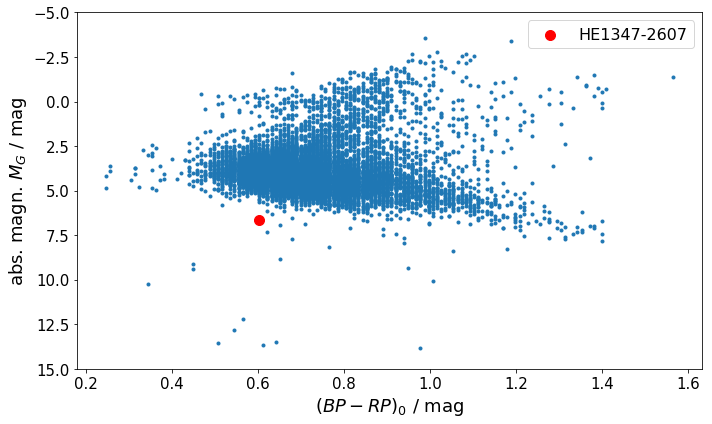

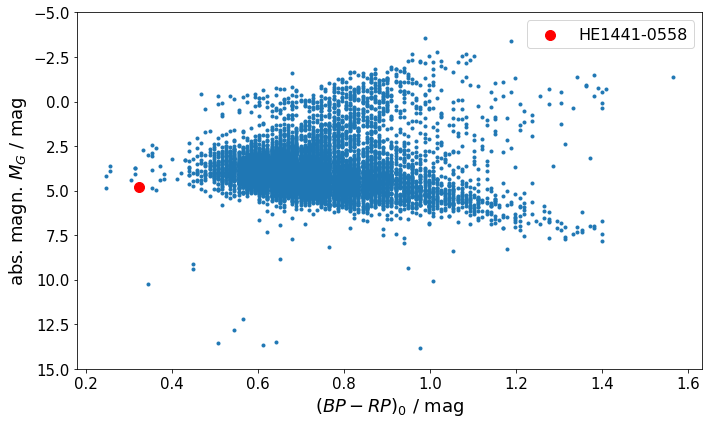

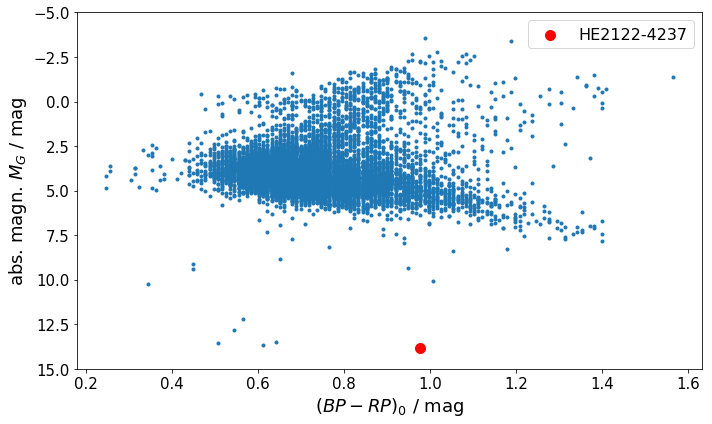

In [20]:
wdlist=np.transpose(np.genfromtxt('white_dwarfs_csv_dered.txt',delimiter=',',skip_header=1))

parallaxx = wdlist[40]
parallax_ex = wdlist[41]
Gx = wdlist[81]
bp_rpx = wdlist[94]
E_B_Vx = wdlist[13]
B_Vx = wdlist[14]

bp_rp_0x = 0.9604*B_Vx + 0.2473

e_bp_rp0x = bp_rpx - bp_rp_0x

# extinction in G band

c1=0.9761*np.ones(np.size(Gx))
c2=-0.1704*np.ones(np.size(Gx))
c3=0.0086*np.ones(np.size(Gx))
c4=0.0011*np.ones(np.size(Gx))
c5=-0.0438*np.ones(np.size(Gx))
c6=0.0013*np.ones(np.size(Gx))
c7=0.0099*np.ones(np.size(Gx))

A_0x=3.1*E_B_Vx

k_Gx=c1+c2*bp_rp_0x+c3*bp_rp_0x**2+c4*bp_rp_0x**3+c5*A_0x+c6*A_0x**2+c7*bp_rp_0x*A_0x

A_Gx=k_Gx*A_0x


M_Gx=Gx+5+5*np.log10(parallaxx/1000) - A_Gx

j = np.array([16,19,24,43,52,69,80,92])
name = ['HE0205-2434','HE0219-3312','HE0233+0105','HE0513-2355','HE1243+0201','HE1347-2607','HE1441-0558','HE2122-4237']

def plot_pos(i,name):
    plt.figure(figsize=(10,6))
    plt.scatter(bp_rp_020,M_G1,marker='.')
    plt.scatter(bp_rp_0x[i],M_Gx[i],s=100,color='r',marker='o',label=name)
    plt.ylim(15,-5)
    plt.yticks(size=15)
    plt.xticks(size=15)
    plt.xlabel('$(BP-RP)_0$ / mag',size=18)
    plt.ylabel('abs. magn. $M_G$ / mag',size=18)
    plt.tight_layout()
    plt.legend(fontsize=16)
    plt.savefig('Abbildungen/Spektren_HRD/'+name+'_in_HRD.png')
    plt.show()

for i in range(np.size(j)):
    plot_pos(j[i],name[i])

In [21]:
wdlist1=np.genfromtxt('white_dwarfs_csv_dered.txt',delimiter=',',skip_header=1,usecols=(40,41,42,81,86,91,94,109,110,111,36,37,38,39,12,0,19,20,21,26,27,28,13))
# 0 parallax
# 1 parallax error
# 2 parallax over error
# 3 G magnitude
# 4 BP magnitude
# 5 RP magnitude
# 6 BP-RP colour
# 7 T_eff
# 8 T_eff lower percentilehttps://duckduckgo.com/
# 9 T_eff upper percentile
# 10 right ascension
# 11 right ascension error
# 12 declination
# 13 declination error
# 14 B magnitude
# 15 absolute magnitude
# 16 KP index (CaII line) in 0.1nm
# 17 KP error in 0.1nm
# 18 GP index (CH G-band) in 0.1nm
# 19 [Fe/H]K
# 20 [Fe/H]R
# 21 [C/Fe]R
# 22 E(B-V)

dist=np.genfromtxt('distances_11_stars.csv',delimiter=',',skip_header=1)

source_ids=open('white_dwarfs_dered.txt','r')
ids=source_ids.readlines()

for i in range(np.size(j)):
    print('Gaia DR2 source id:',ids[j[i]+1][366:387])
    print('ra: ('+str(wdlist1[j[i]][10])+u' \u00B1 '+str(round(wdlist1[j[i]][11],5))+')°')
    print('dec: ('+str(wdlist1[j[i]][12])+u' \u00B1 '+str(round(wdlist1[j[i]][13],5))+')°')
    print('parallax: ('+str(round(wdlist1[j[i]][0],5))+u' \u00B1 '+str(round(wdlist1[j[i]][1],5))+') mas')
    print('Distance estimate: '+str(round(dist[i][4],2))+' ( + '+str(round(dist[i][6]-dist[i][4],2))+' , - '+str(round(dist[i][4]-dist[i][5],2))+') pc')
    print('G magnitude in mag:',round(wdlist1[j[i]][3],3))
    print('BP magnitude in mag:',round(wdlist1[j[i]][4],3))
    print('RP magnitude in mag:',round(wdlist1[j[i]][5],3))
    print('BP-RP colour in mag:',round(wdlist1[j[i]][6],3))
    print('$(BP-RP)_0$ colour in mag:',round(bp_rp_0x[j[i]],3))
    print('B magnitude in mag:',wdlist1[j[i]][14])
    print('Absolute magnitude in mag:',round(wdlist1[j[i]][15],3))
    print('Effective Temperature: '+str(round(wdlist1[j[i]][7],1))+' ( + '+str(round(wdlist1[j[i]][9]-wdlist1[j[i]][7],1))+' , - '+str(round(wdlist1[j[i]][7]-wdlist1[j[i]][8],1))+') K')
    print('KP Index (CaII line): ('+str(wdlist1[j[i]][16])+u' \u00B1 '+str(wdlist1[j[i]][17])+')*0.1nm')
    print('GP Index (CH G-band): '+str(wdlist1[j[i]][18])+'*0.1nm')
    print('[Fe/H]K:',wdlist1[j[i]][19])
    print('[Fe/H]R:',wdlist1[j[i]][20])
    print('[C/Fe]R:',wdlist1[j[i]][21])
    print('\n')

Gaia DR2 source id:  5121507363836349312 
ra: (31.95321289058353 ± 0.08601)°
dec: (-24.335106528510668 ± 0.06388)°
parallax: (0.79186 ± 0.10542) mas
Distance estimate: 1192.91 ( + 173.97 , - 136.41) pc
G magnitude in mag: 16.493
BP magnitude in mag: 16.777
RP magnitude in mag: 16.033
BP-RP colour in mag: 0.744
$(BP-RP)_0$ colour in mag: 0.747
B magnitude in mag: 16.8
Absolute magnitude in mag: 5.934
Effective Temperature: 6084.3 ( + 271.5 , - 297.3) K
KP Index (CaII line): (1.7 ± 2.3)*0.1nm
GP Index (CH G-band): 3.2*0.1nm
[Fe/H]K: nan
[Fe/H]R: nan
[C/Fe]R: nan


Gaia DR2 source id:  4970501884284727680 
ra: (35.396400833882765 ± 0.01569)°
dec: (-32.97696563270841 ± 0.01986)°
parallax: (7.47223 ± 0.0327) mas
Distance estimate: 133.32 ( + 0.59 , - 0.58) pc
G magnitude in mag: 15.041
BP magnitude in mag: 15.592
RP magnitude in mag: 14.323
BP-RP colour in mag: 1.27
$(BP-RP)_0$ colour in mag: 0.948
B magnitude in mag: 16.5
Absolute magnitude in mag: 9.357
Effective Temperature: 4800.0 ( + 2